Problem Statement
The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

Objective:

The objective of this project is to develop a machine learning model capable of learning from the measurements of iris flowers and accurately classifying them into their respective species. The model's primary goal is to automate the classification process based on the distinct characteristics of each iris species.

Project Details:

Iris Species: The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.
Key Measurements: The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.
Machine Learning Model: The project involves the creation and training of a machine learning model to accurately classify iris flowers based on their measurements.
This project's significance lies in its potential to streamline and automate the classification of iris species, which can have broader applications in botany, horticulture, and environmental monitoring.

In [5]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv("E://datascience//Iris.csv")

In [7]:
# View top 5 rows of the dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
print(df.shape[0])
print(df.shape[1])

150
5


Exploratory data analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 3


In [11]:
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.columns



Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
df.describe(include= 'all').round(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [20]:
data=df.iloc[:,1:]
     

# New updated dataset
data.head()
     

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


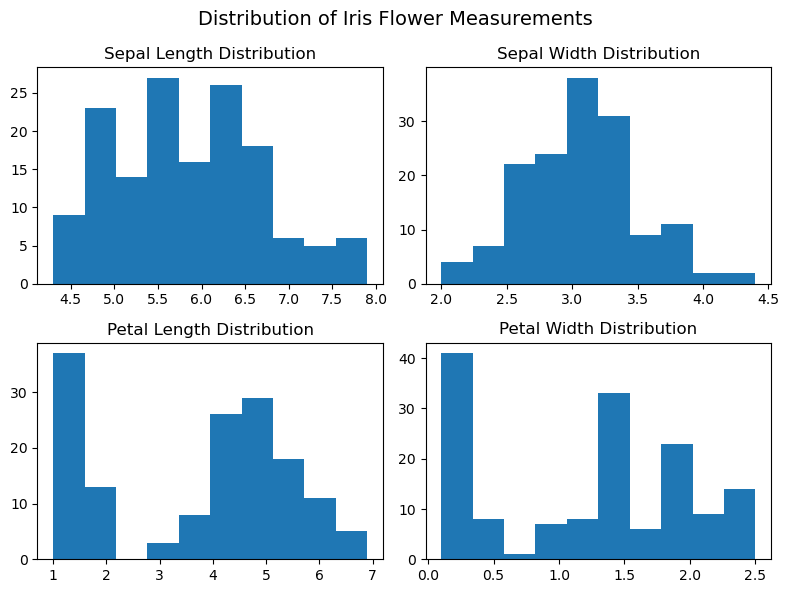

In [22]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()
     

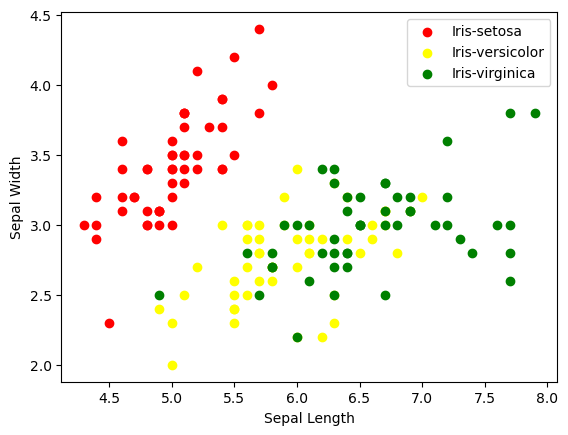

In [24]:
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
     

# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     


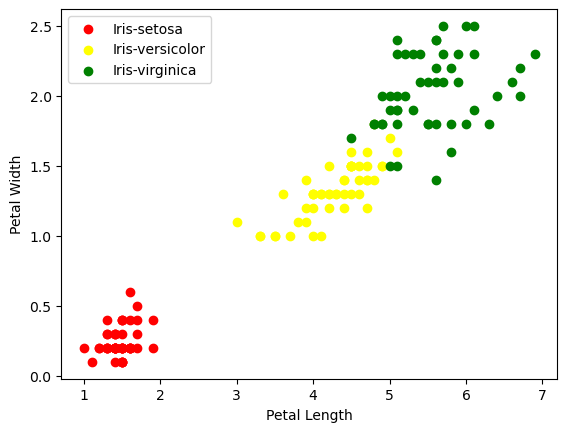

In [25]:
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     


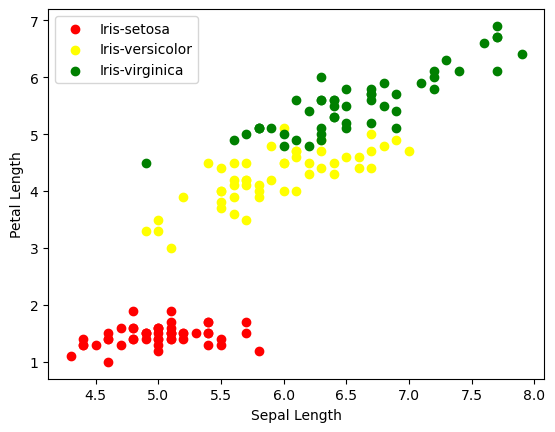

In [26]:
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     

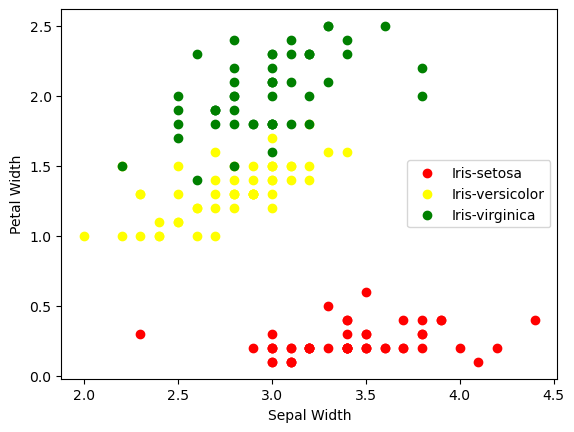

In [32]:
for i in range(3):
    # Select data for the current species.
    x = df[df['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

In [33]:
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species)

Encoded Species Values:
[0 1 2]


In [34]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']
     

# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
     

# Checking the train distribution of dependent variable
y_train.value_counts()
     

Species
0    37
1    35
2    33
Name: count, dtype: int64

MODEL DEVELOPMENT

In [36]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score
     

# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])
     


Confusion Matrix:


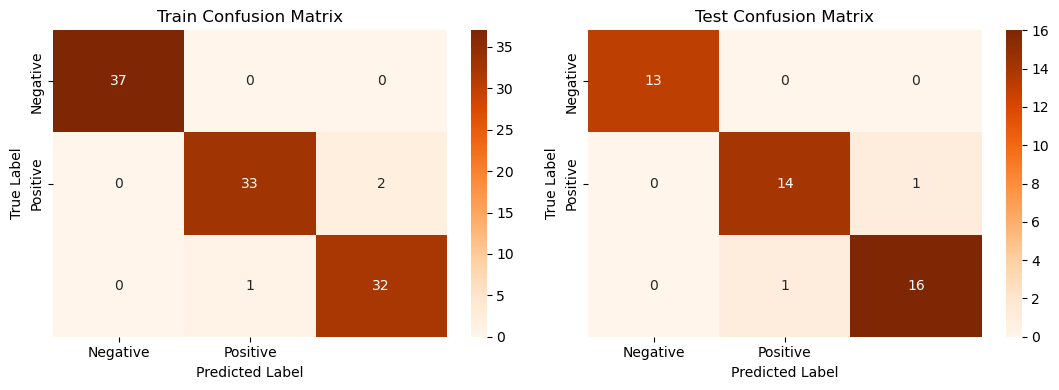


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.941176 | 0.969697 |   0.955224 |  33        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970588 | 0.970851 |   0.970582 | 105        |
| weighted avg |    0.971709 | 0.971429 |   0.971435 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.941176 | 0.941176 |   0.941176 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [37]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model
     

# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
     

In [38]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.971709
Precision Test,0.955556
Recall Train,0.971429
Recall Test,0.955556
Accuracy Train,0.971429
Accuracy Test,0.955556
F1 macro Train,0.971435
F1 macro Test,0.955556


Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'saga'}

Confusion Matrix:


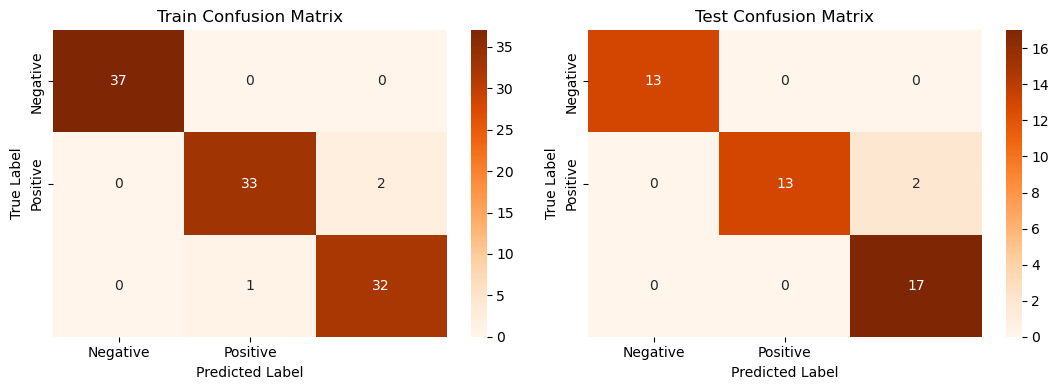


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.970588 | 0.942857 |   0.956522 |  35        |
| 2            |    0.941176 | 0.969697 |   0.955224 |  33        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970588 | 0.970851 |   0.970582 | 105        |
| weighted avg |    0.971709 | 0.971429 |   0.971435 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    1        | 0.866667 |   0.928571 | 15        |
| 2            |    0.894737 | 1        |   0.944444 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [39]:
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)
     
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)
     

# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [40]:
score['Logistic regression tuned'] = lr_score2



Confusion Matrix:


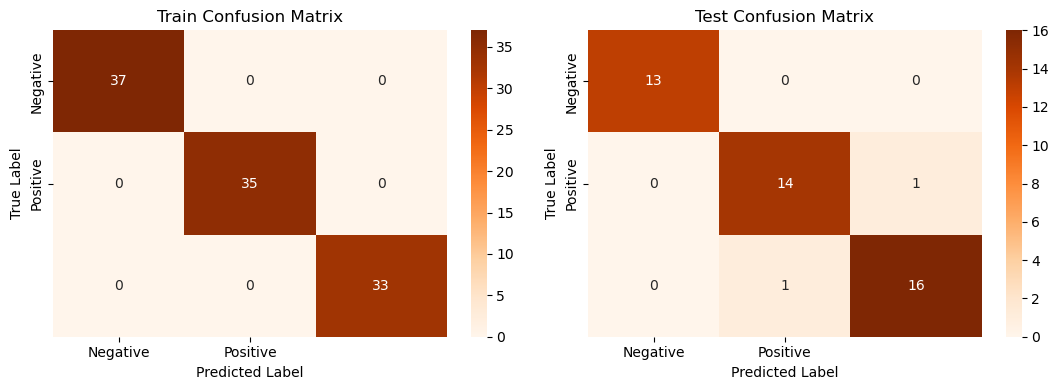


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        37 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.941176 | 0.941176 |   0.941176 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [41]:
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model
     

# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)
     

In [42]:
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.971709,0.971709,1.000000
Precision Test,0.955556,0.960234,0.955556
Recall Train,0.971429,0.971429,1.000000
Recall Test,0.955556,0.955556,0.955556
Accuracy Train,0.971429,0.971429,1.000000
Accuracy Test,0.955556,0.955556,0.955556
F1 macro Train,0.971435,0.971435,1.000000
F1 macro Test,0.955556,0.955203,0.955556


In [43]:
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}



Confusion Matrix:


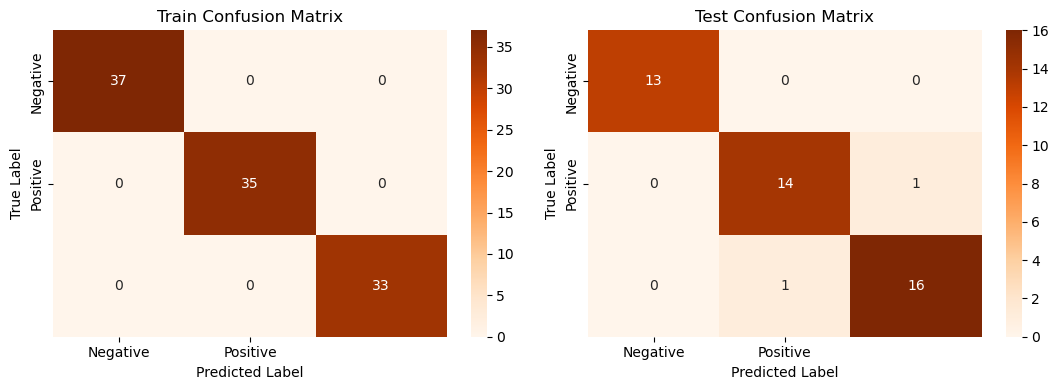


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        37 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.941176 | 0.941176 |   0.941176 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [45]:
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model
     

# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)
     

In [49]:

# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest
Precision Train,0.971709,0.971709,1.000000,1.000000
Precision Test,0.955556,0.960234,0.955556,0.955556
Recall Train,0.971429,0.971429,1.000000,1.000000
Recall Test,0.955556,0.955556,0.955556,0.955556
Accuracy Train,0.971429,0.971429,1.000000,1.000000
Accuracy Test,0.955556,0.955556,0.955556,0.955556
F1 macro Train,0.971435,0.971435,1.000000,1.000000
F1 macro Test,0.955556,0.955203,0.955556,0.955556



Confusion Matrix:


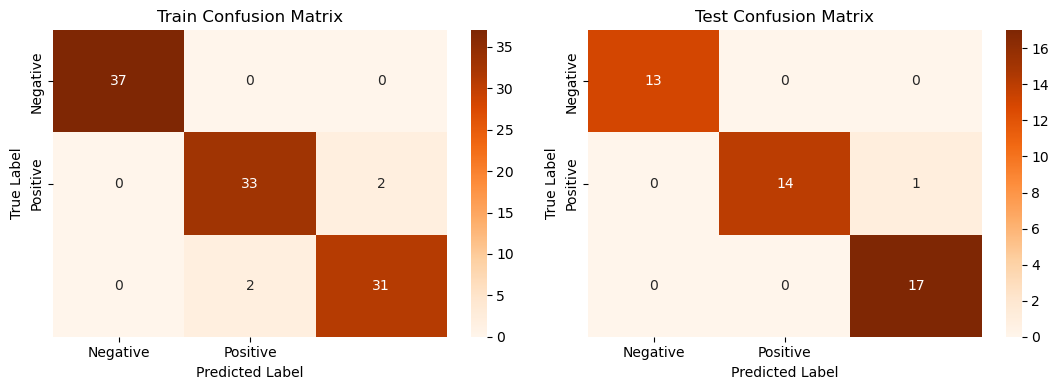


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.942857 | 0.942857 |   0.942857 |  35        |
| 2            |    0.939394 | 0.939394 |   0.939394 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96075  | 0.96075  |   0.96075  | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    1        | 0.933333 |   0.965517 | 15        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [50]:
svm_model = SVC(kernel='linear', random_state=0, probability=True)



# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)
     

In [51]:

# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM
Precision Train,0.971709,0.971709,1.000000,1.000000,0.961905
Precision Test,0.955556,0.960234,0.955556,0.955556,0.979012
Recall Train,0.971429,0.971429,1.000000,1.000000,0.961905
Recall Test,0.955556,0.955556,0.955556,0.955556,0.977778
Accuracy Train,0.971429,0.971429,1.000000,1.000000,0.961905
Accuracy Test,0.955556,0.955556,0.955556,0.955556,0.977778
F1 macro Train,0.971435,0.971435,1.000000,1.000000,0.961905
F1 macro Test,0.955556,0.955203,0.955556,0.955556,0.977712



Confusion Matrix:


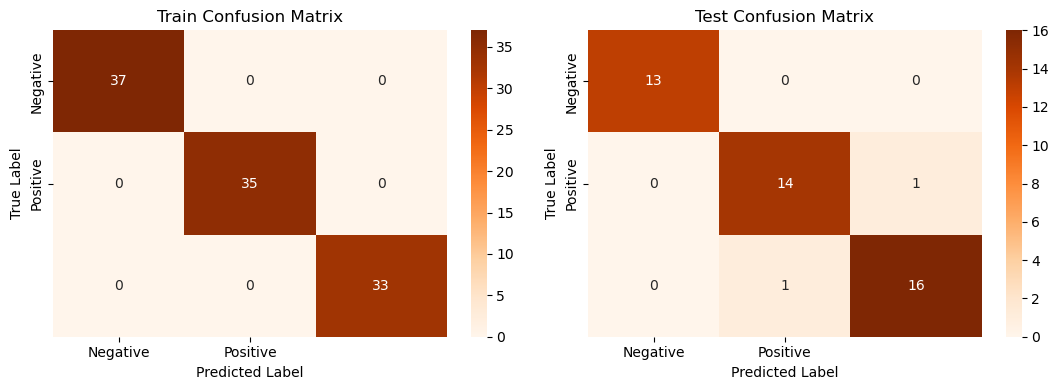


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        37 |
| 1            |           1 |        1 |          1 |        35 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.941176 | 0.941176 |   0.941176 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [53]:
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model
     

# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [54]:
score['XGB'] = xgb_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB
Precision Train,0.971709,0.971709,1.000000,1.000000,0.961905,1.000000
Precision Test,0.955556,0.960234,0.955556,0.955556,0.979012,0.955556
Recall Train,0.971429,0.971429,1.000000,1.000000,0.961905,1.000000
Recall Test,0.955556,0.955556,0.955556,0.955556,0.977778,0.955556
Accuracy Train,0.971429,0.971429,1.000000,1.000000,0.961905,1.000000
Accuracy Test,0.955556,0.955556,0.955556,0.955556,0.977778,0.955556
F1 macro Train,0.971435,0.971435,1.000000,1.000000,0.961905,1.000000
F1 macro Test,0.955556,0.955203,0.955556,0.955556,0.977712,0.955556



Confusion Matrix:


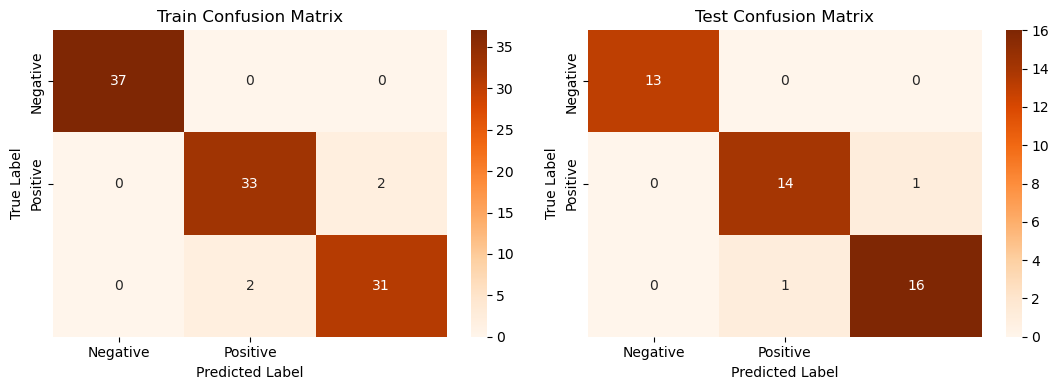


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  37        |
| 1            |    0.942857 | 0.942857 |   0.942857 |  35        |
| 2            |    0.939394 | 0.939394 |   0.939394 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96075  | 0.96075  |   0.96075  | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 13        |
| 1            |    0.933333 | 0.933333 |   0.933333 | 15        |
| 2            |    0.941176 | 0.941176 |   0.941176 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [55]:
nb_model = GaussianNB()

# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)
     

In [56]:
score['Naive Bayes'] = nb_score
score
     

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,XGB,Naive Bayes
Precision Train,0.971709,0.971709,1.000000,1.000000,0.961905,1.000000,0.961905
Precision Test,0.955556,0.960234,0.955556,0.955556,0.979012,0.955556,0.955556
Recall Train,0.971429,0.971429,1.000000,1.000000,0.961905,1.000000,0.961905
Recall Test,0.955556,0.955556,0.955556,0.955556,0.977778,0.955556,0.955556
Accuracy Train,0.971429,0.971429,1.000000,1.000000,0.961905,1.000000,0.961905
Accuracy Test,0.955556,0.955556,0.955556,0.955556,0.977778,0.955556,0.955556
F1 macro Train,0.971435,0.971435,1.000000,1.000000,0.961905,1.000000,0.961905
F1 macro Test,0.955556,0.955203,0.955556,0.955556,0.977712,0.955556,0.955556


In [57]:
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic regression,0.971709,0.955556,0.971429,0.955556,0.971429,0.955556,0.971435,0.955556
Logistic regression tuned,0.971709,0.960234,0.971429,0.955556,0.971429,0.955556,0.971435,0.955203
SVM,0.961905,0.979012,0.961905,0.977778,0.961905,0.977778,0.961905,0.977712
Naive Bayes,0.961905,0.955556,0.961905,0.955556,0.961905,0.955556,0.961905,0.955556


In [58]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models
     


In [59]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: SVM - 0.979
Recall: SVM - 0.9778
Accuracy: SVM - 0.9778
F1 macro: SVM - 0.9777


In [62]:
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())
     

| Classification Model      |   Recall Train |   Recall Test |
|:--------------------------|---------------:|--------------:|
| Logistic regression       |       0.971429 |      0.955556 |
| Logistic regression tuned |       0.971429 |      0.955556 |
| SVM                       |       0.961905 |      0.977778 |
| Naive Bayes               |       0.961905 |      0.955556 |


Conclusion

In the Iris flower classification project, the tuned Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

Data Exploration: Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

Data Preprocessing: Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

Model Selection: After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

Model Training and Evaluation: The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

Challenges and Future Work: The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

Practical Application: The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.